In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv('./googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape #Printing the shape of the dataset

(10841, 13)

In [5]:
df.dtypes #The datatypes of all the columns present in the dataset

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum() #Count of Null values in each column

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Data Cleaning 

In [8]:
#includes correcting the datatypes of the columns, dealing with Null and duplicate data etc.

#### Correcting the column datatypes

In [9]:
df.dtypes #Before Type Conversion

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [10]:
def convert_size_to_bytes(size):
    if size == 'Varies with device': return np.nan
    unit = size[-1]
    
    if unit == 'M':
        return float(size[:-1]) * 1024 * 1024
    
    elif unit == 'K':
        return float(size[:-1]) * 1024

In [11]:
# Converting the columns to the most suitable data types. errors='coerce' converts any unsupported value to NAN and proceeds to next value.
# errors='ignore' stops the conversion and restores the original type for the already converted values.
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce') 
df['Installs'] = pd.to_numeric(df['Installs'].str.replace('+', '').str.replace(',', ''), errors='coerce')
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format="%B %d, %Y", errors='coerce')
df['Price'] = pd.to_numeric(df['Price'].apply(lambda x: x.replace('$', '') if '$' in x else x), errors='coerce')
df['Size'] = pd.to_numeric(df['Size'].apply(convert_size_to_bytes), errors='coerce')

In [12]:
df.dtypes # After Type Conversion

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                     float64
Installs                 float64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [13]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,9122611.2,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,26214400.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2936012.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


#### Dealing with Null data

In [16]:
# Categorical Columns can be filled with the Mode values, Quantitative columns can be filled with Mean (if no outliers) or Median (if data is skewed)

In [14]:
df.isnull().sum() # Null values before

App                  0
Category             0
Rating            1474
Reviews              1
Size              2012
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64

In [15]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9367.000000,1.084000e+04,8.829000e+03,1.084000e+04,10840.000000
mean,4.193338,4.441529e+05,2.335235e+07,1.546434e+07,1.027368
std,0.537431,2.927761e+06,2.372790e+07,8.502936e+07,15.949703
min,1.000000,0.000000e+00,1.048576e+06,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.662310e+06,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.468006e+07,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,3.250586e+07,5.000000e+06,0.000000
max,19.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000


In [18]:
# Analysing the Rating Column - From the above output it can be seen that there is an 'outlier' in the data with Rating of 19 (Max should be 5)

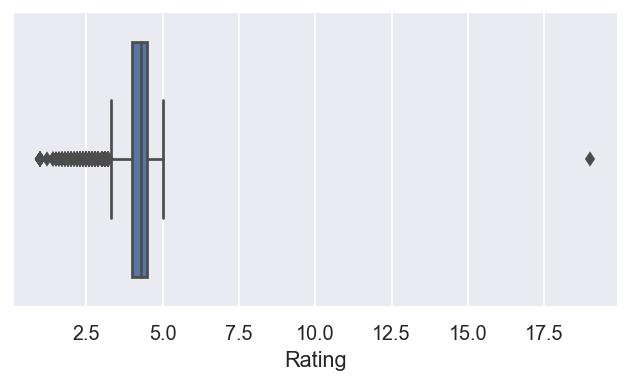

In [37]:
plt.figure(figsize=(6,3), dpi=130)
sns.set_style('darkgrid')
sns.boxplot(data=df, x='Rating')
plt.show();

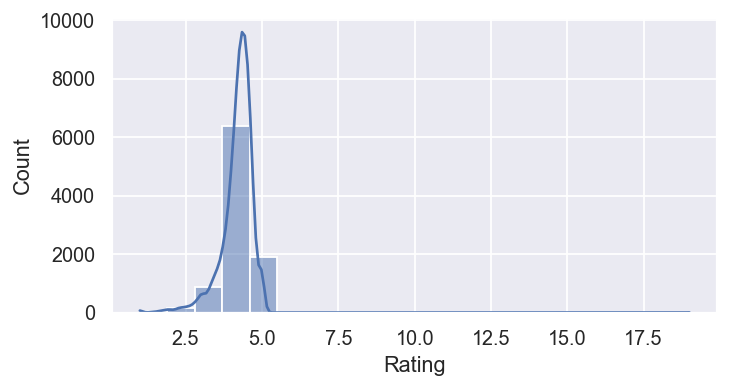

In [44]:
plt.figure(figsize=(6,3), dpi=130)
sns.histplot(df['Rating'], kde=True, bins=20)
plt.show();

In [53]:
# To fill the NAN values in 'Rating' column - 

# 1. We can either remove the outlier first and then take the mean of the column and set it to replace the NAN values
# 2. We can take the Median and set it to replace the NAN values and deal with the outlier later

# I am taking the first approach here.

In [54]:
df.loc[df['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,NaN,NaN,0,NaN,NaN,"February 11, 2018",NaT,4.0 and up,NaN


In [56]:
df = df.drop(index=df.loc[df['Rating'] == 19].index)

In [58]:
df.iloc[10470:10475] # The Outlier has been dropped

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49.0,4194304.0,10000.0,Free,0.0,Everyone,Communication,2017-02-10,0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042.0,NaN,100000.0,Free,0.0,Everyone,Personalization,2014-08-05,3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203.0,4299161.6,10000000.0,Free,0.0,Everyone,Tools,2018-08-07,6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37.0,14680064.0,1000.0,Free,0.0,Everyone,Communication,2014-11-21,2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132.0,2726297.6,50000.0,Free,0.0,Everyone,Tools,2017-05-17,0.0.9,2.3 and up


In [59]:
# Filling the NAN values in the Rating column with the Mean of the column

In [60]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [73]:
df.isnull().sum() # All the NAN values in the 'Rating' column have been filled with the median value - 4.3. Also, the above record 
# with Rating = 19 had NAN values for alot of columns which have been fixed now that it's deleted. 

App                  0
Category             0
Rating               0
Reviews              0
Size              2011
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

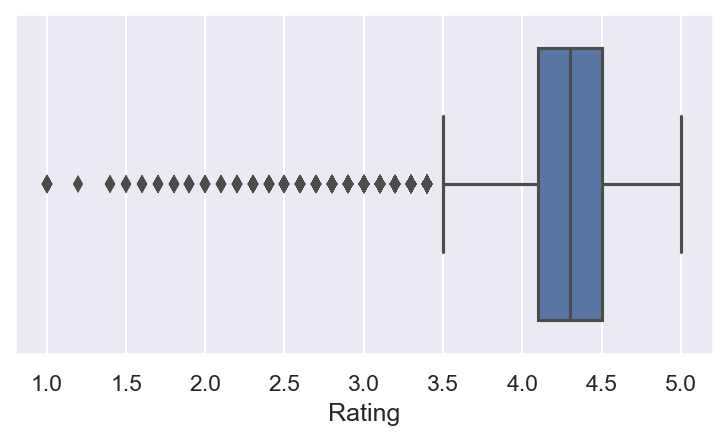

In [66]:
plt.figure(figsize=(6,3), dpi=150)
sns.set_style('darkgrid')
sns.boxplot(data=df, x='Rating')
plt.show();

In [67]:
df['Rating'].describe() # The above box plots matches the data below. 

# The Median of the data is 4.3, The first Quartile is 4.1 while the third Quartile is 4.5 which means the IQR is 0.4. The Whiskers are 1.5 * IQR 
# which is 3.5 and 5.1 and anything beyond these points are the outliers.

count    10840.000000
mean         4.206476
std          0.480342
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

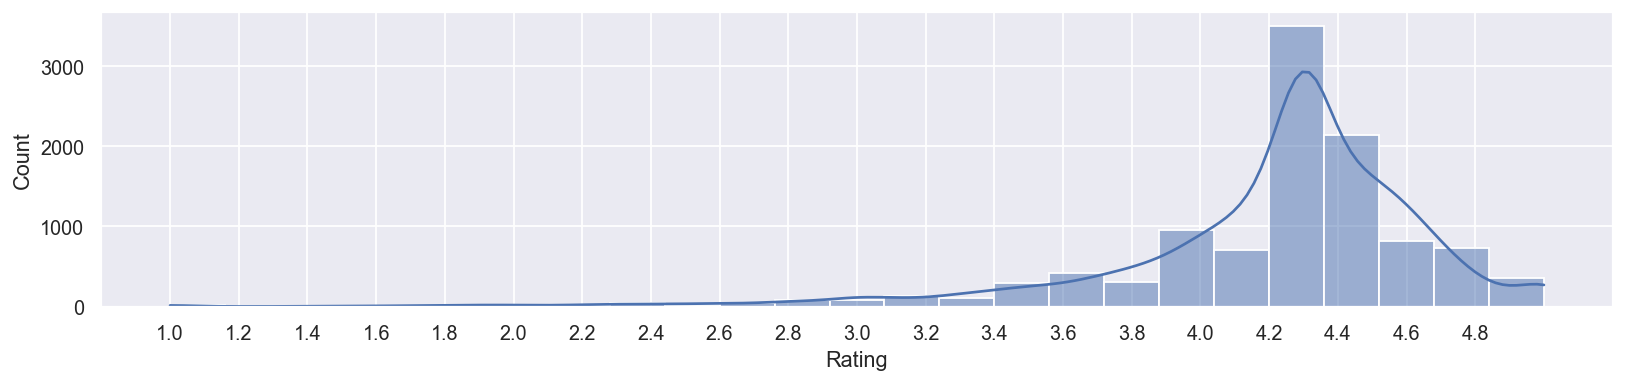

In [72]:
plt.figure(figsize=(15,3), dpi=130)
sns.histplot(df['Rating'], kde=True, bins=25)
plt.xticks(np.arange(1,5,0.2))
plt.show();

In [74]:
# Analysing the 'Size' column

In [76]:
df['Size'].describe()

count    8.829000e+03
mean     2.335235e+07
std      2.372790e+07
min      1.048576e+06
25%      5.662310e+06
50%      1.468006e+07
75%      3.250586e+07
max      1.048576e+08
Name: Size, dtype: float64

In [77]:
df.loc[df['Size'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639.0,NaN,5000000.0,Free,0.00,Everyone,Art & Design,2018-07-14,Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221.0,NaN,10000000.0,Free,0.00,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057.0,NaN,1000000.0,Free,0.00,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403.0,NaN,100000.0,Free,0.00,Everyone,Auto & Vehicles,2014-08-26,1.0.1,2.2 and up
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211.0,NaN,5000000.0,Free,0.00,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10798,Word Search Tab 1 FR,FAMILY,4.3,0.0,NaN,50.0,Paid,1.04,Everyone,Puzzle,2012-02-06,1.1,3.0 and up
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486.0,NaN,5000000.0,Free,0.00,Mature 17+,Social,2018-03-23,Varies with device,Varies with device
10832,FR Tides,WEATHER,3.8,1195.0,NaN,100000.0,Free,0.00,Everyone,Weather,2014-02-16,6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,NaN,1000.0,Free,0.00,Everyone,Books & Reference,2014-03-23,0.8,2.2 and up
